In [ ]:
## Telco Customer Churn Prediction

**Objective:**  
Predict whether a customer will churn using machine learning models.

**Models used:**
- Logistic Regression
- Decision Tree
- Random Forest

**Evaluation:**
- Accuracy
- Confusion Matrix

**Result:**
Random Forest achieved the best performance (~80% accuracy).

In [1]:
# Telco Customer Churn Prediction
# Goal: Predict customer churn using ML models and evaluate performance.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

In [2]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


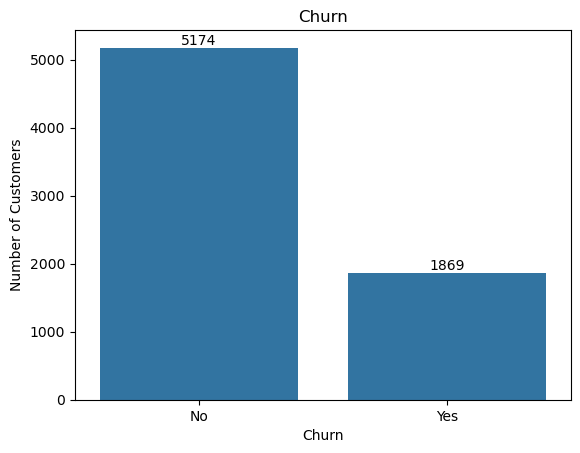

In [6]:
sns.countplot(data = df, x="Churn")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom')
plt.title("Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

In [7]:
tenure_churn = df.groupby("tenure")["Churn"].count()

In [8]:
tenure_churn

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Churn, Length: 73, dtype: int64

In [9]:
bins = [0, 12, 24, 36, 48, 60, 76]
labels = ["0-12","13-24","25-36","37-48","49-60","61-72"]
df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels)

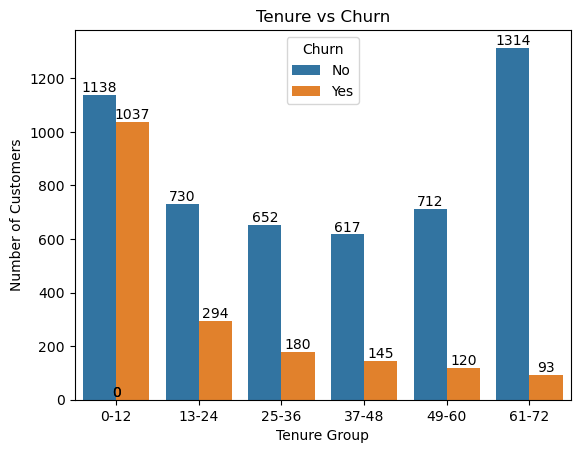

In [10]:
sns.countplot(data = df, x="tenure_group",hue="Churn")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom')
plt.title("Tenure vs Churn")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.show()

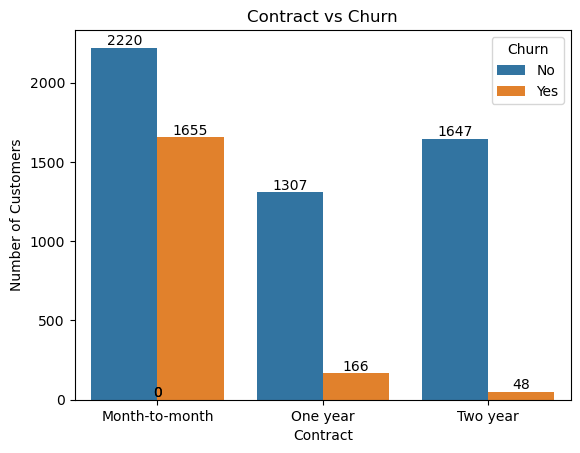

In [11]:
sns.countplot(data = df, x="Contract", hue="Churn")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom')
plt.title("Contract vs Churn")
plt.xlabel("Contract")
plt.ylabel("Number of Customers")
plt.show()

In [12]:
df['MonthlyCharges'].min(), df['MonthlyCharges'].max()

(18.25, 118.75)

In [13]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ["0-20","21-40","41-60","61-80","81-100","101-120"]
df["monthly_group"] = pd.cut(df["MonthlyCharges"], bins=bins, labels=labels)

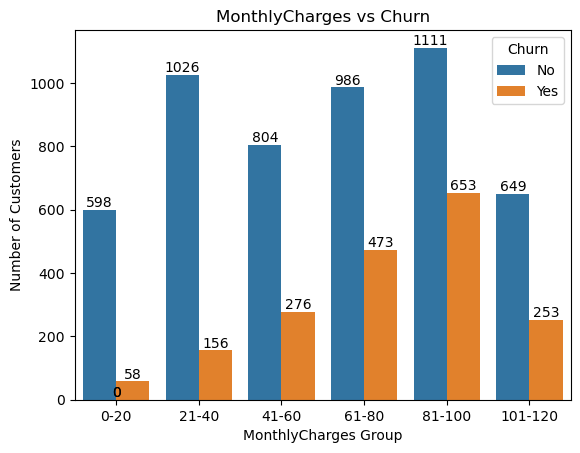

In [14]:
sns.countplot(data = df, x="monthly_group", hue="Churn")
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom')
plt.title("MonthlyCharges vs Churn")
plt.xlabel("MonthlyCharges Group")
plt.ylabel("Number of Customers")
plt.show()

In [15]:
df = df.drop(columns=["customerID","monthly_group", "tenure_group"])
yes_no_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes":1, "No": 0})
df = pd.get_dummies(df, drop_first=True)

In [16]:
y = df["Churn"]
x = df.drop(columns=["Churn"])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(5634, 6559)
(1409, 6559)


Logistic Regression Accuracy: 78.0 %


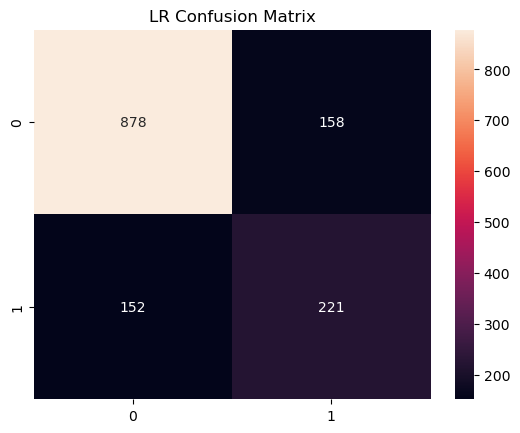

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr_model = LogisticRegression(
    max_iter=500,
    solver="liblinear"
)
lr_model.fit(x_train_scaled, y_train)
lr_y_pred = lr_model.predict(x_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", round(lr_accuracy*100,2),"%")
cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("LR Confusion Matrix")
plt.show()

Decision Tree Accuracy: 79.56 %


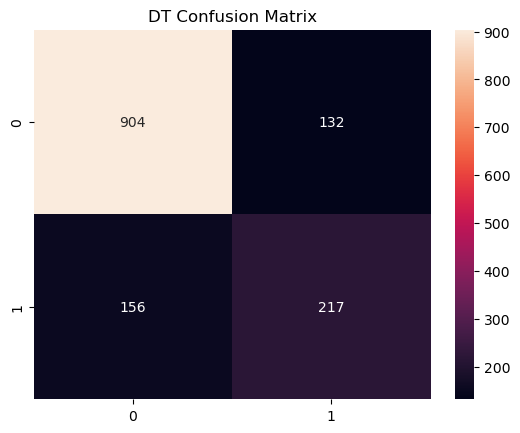

In [19]:
dt_model = DecisionTreeClassifier(max_depth=8, min_samples_split=20, random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", round(dt_accuracy*100,2),"%")
cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("DT Confusion Matrix")
plt.show()

Random Forest Accuracy: 79.84 %


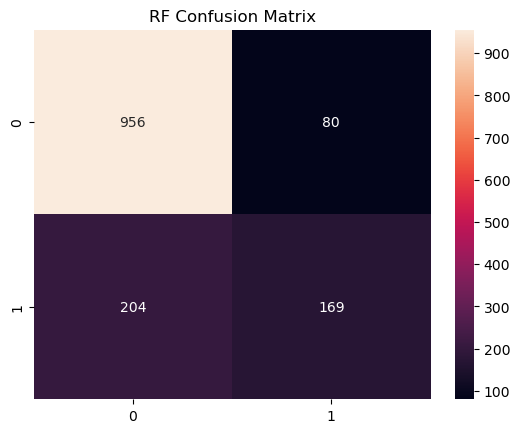

In [20]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", round(rf_accuracy*100,2),"%")
cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("RF Confusion Matrix")
plt.show()

In [21]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy]
}
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy
0,Logistic Regression,0.779986
1,Decision Tree,0.795600
2,Random Forest,0.798439


In [22]:
print(classification_report(y_test, lr_y_pred))
print(classification_report(y_test, dt_y_pred))
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.58      0.60       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.79      1409

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



In [ ]:
# Conclusion:
# - Logistic Regression provides a strong baseline with interpretable results.
# - Decision Tree captures non-linear patterns but risks overfitting.
# - Random Forest achieved the best performance (~80% accuracy),
#   making it the most reliable model for churn prediction.